In [72]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
import scipy.io.wavfile as wav

In [74]:
path = './kaggle/input/sample.wav'
rate, audio_data = wav.read(path)

In [75]:
import IPython

In [76]:
IPython.display.Audio(path)

# -- Amplitude

In [77]:
# Criar um DataFrame com os dados de áudio
df = pd.DataFrame({'Amostra': np.arange(len(audio_data)), 'Valor': audio_data})

# Exibir o DataFrame como uma tabela
print(df)

df['nova_amostra'] = df['Valor']*7

        Amostra  Valor
0             0      0
1             1      0
2             2      0
3             3      0
4             4      0
...         ...    ...
158553   158553      0
158554   158554      0
158555   158555      0
158556   158556      0
158557   158557      0

[158558 rows x 2 columns]


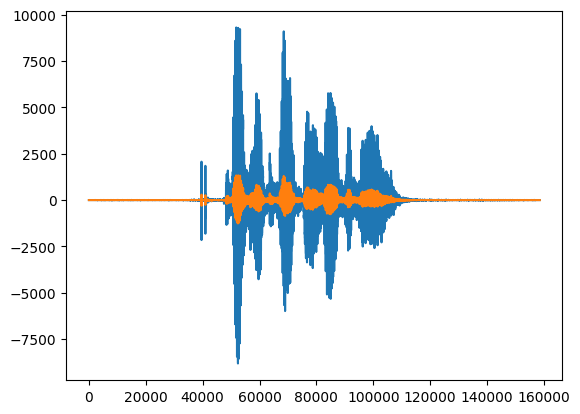

In [78]:
#Aumentar a amplitude => em aumentar o volume
plt.plot(df['Amostra'], df['nova_amostra'])
plt.plot(df['Amostra'], df['Valor'])
plt.show()

In [79]:
df

,Amostra,Valor,nova_amostra
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
158553,158553,0,0
158554,158554,0,0
158555,158555,0,0
158556,158556,0,0


In [80]:
audio_data

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [81]:
wavfile.write('audio_salvo.wav', 48000, audio_data)
IPython.display.Audio('audio_salvo.wav')

In [83]:
#Aumentar Volume (aumentar a amplitude)
wavfile.write('audio_salvo2.wav', 48000, df['nova_amostra'])
IPython.display.Audio('audio_salvo2.wav')

# -- Frequência

In [84]:
#Aumentar Volume (aumentar a amplitude)
wavfile.write('audio_salvo2.wav', rate*2, df['nova_amostra'])
IPython.display.Audio('audio_salvo2.wav')

In [86]:
#Aumentar Volume (aumentar a amplitude)
wavfile.write('audio_salvo2.wav', int(rate/2), df['nova_amostra'])
IPython.display.Audio('audio_salvo2.wav')

# -- Função

In [224]:

def funcao_atenuante(dados):
    # Calcula o seno dos dados
    funcao = np.sin(dados) + np.cos(dados -np.pi)
    return funcao

In [225]:
np.sin(df['Amostra'])

0         0.000000
1         0.841471
2         0.909297
3         0.141120
4        -0.756802
            ...   
158553    0.039624
158554   -0.819401
158555   -0.925073
158556   -0.180236
158557    0.730308
Name: Amostra, Length: 158558, dtype: float64

In [226]:
df['funcao_atenuante'] = (funcao_atenuante(df['Amostra']))*df['Valor']

In [227]:
df['funcao_atenuante'] = df['funcao_atenuante'].astype(np.int16)

In [219]:
type(df['Valor'][0])

numpy.int16

In [228]:
df

,Amostra,Valor,nova_amostra,funcao_atenuante
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
158553,158553,0,0,0
158554,158554,0,0,0
158555,158555,0,0,0
158556,158556,0,0,0


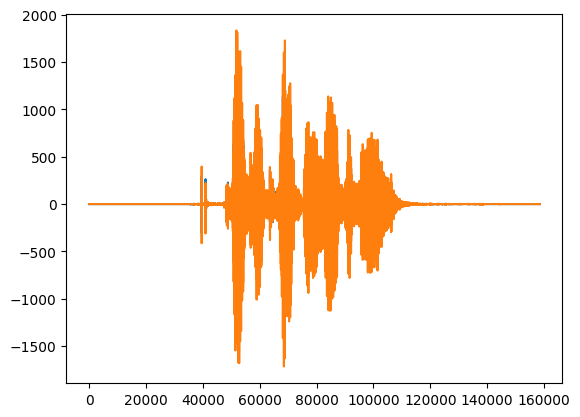

In [230]:
plt.plot(df['Amostra'], df['Valor'])
plt.plot(df['Amostra'], df['funcao_atenuante'])
plt.show()

In [231]:
#Aumentar Volume (aumentar a amplitude)
wavfile.write('audio_salvo3.wav', rate, df['funcao_atenuante'])
IPython.display.Audio('audio_salvo3.wav')

In [243]:
import numpy as np
from scipy.io.wavfile import write
from scipy.signal import square

# Parâmetros do sinal de áudio
fs = rate  # Taxa de amostragem (em Hz)
duracao = 3  # Duração do sinal (em segundos)
frequencia = 440  # Frequência do sinal (em Hz)

# Tempo do sinal
t = np.linspace(0, duracao, len(df['Amostra']), endpoint=False)

# Criar onda quadrada
sinal_quadrado = square(2 * np.pi * frequencia * t)

# Normalizar o sinal para valores int16
sinal_quadrado_int16 = np.int16(sinal_quadrado * 32767)

# Salvar o sinal em um arquivo .wav
write("sinal_quadrado.wav", fs, sinal_quadrado_int16)

print("Arquivo 'sinal_quadrado.wav' criado com sucesso.")

Arquivo 'sinal_quadrado.wav' criado com sucesso.


In [244]:
wavfile.write("sinal_quadrado.wav", fs, sinal_quadrado_int16)
IPython.display.Audio('sinal_quadrado.wav')

In [269]:
df['onda_quadrada'] = sinal_quadrado_int16/14
df['onda_quadrada'] = df['onda_quadrada'].astype(np.int16)

In [270]:
df['onda_quadrada'] = df['onda_quadrada'] + df['Valor']*5
df['onda_quadrada'] = df['onda_quadrada'].astype(np.int16)

In [271]:
wavfile.write('audio_salvo4.wav', rate, df['onda_quadrada'])
IPython.display.Audio('audio_salvo4.wav')

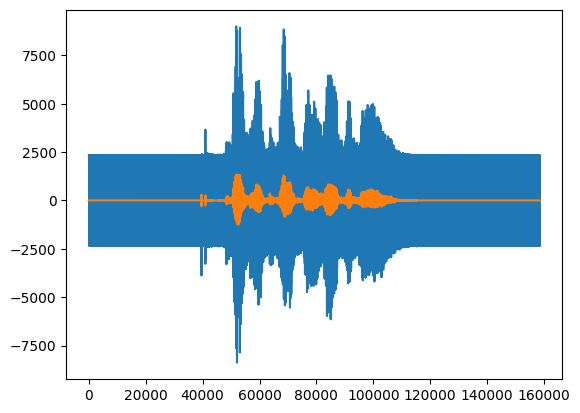

In [272]:
plt.plot(df['Amostra'], df['onda_quadrada'])
plt.plot(df['Amostra'], df['Valor'])
plt.show()

# --

In [ ]:
# Load the dataset
path = './kaggle/input/voicegender/voice.csv'
data = pd.read_csv(path)

# Convert labels from categorical to numerical
data['label'] = data['label'].replace(['male', 'female'], [0, 1])

# Remove duplicates
data = data.drop_duplicates()

# Split the dataset into features and target variable
x = data.drop('label', axis=1)
y = data['label']


In [ ]:
# Visualize the distribution of labels
sns.countplot(x='label', data=data)
plt.show()

# Scatter plot for mean frequency vs. label
plt.scatter(x=data['meanfreq'], y=data['label'])
plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.30)


In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


In [ ]:
# Predictions
y_pred = lr.predict(x_test)

# Accuracy
print("Accuracy:", lr.score(x_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')  # Add a dashed line for reference
plt.show()


# -- Ideias

In [273]:
#Amplificação/Atenuação: Multiplique cada amostra de áudio por um fator para aumentar (amplificar) ou diminuir (atenuar) o volume.



def amplificar_audio(audio_data, fator):
    return audio_data * fator

def atenuar_audio(audio_data, fator):
    return audio_data / fator


#Reversão: Inverter a ordem das amostras de áudio para reproduzi-las ao contrário.


def reverter_audio(audio_data):
    return audio_data[::-1]


#Ruido:

def adicionar_ruido(audio_data, amplitude_ruido):
    ruido = np.random.uniform(-amplitude_ruido, amplitude_ruido, len(audio_data))
    return audio_data + ruido


#Eco/Reverberação: Adicionar uma cópia atrasada do sinal para simular um eco ou reverberação.


def adicionar_reverberacao(audio_data, atraso, fator_reverberacao):
    sinal_atrasado = np.zeros_like(audio_data)
    sinal_atrasado[atraso:] = audio_data[:-atraso] * fator_reverberacao
    return audio_data + sinal_atrasado
    
#Filtro Passa-Baixa/Passa-Alta: Aplicar um filtro para suavizar o áudio ou remover frequências altas.

from scipy.signal import butter, filtfilt

def aplicar_filtro_passa_baixa(audio_data, freq_corte, fs):
    ordem = 5
    b, a = butter(ordem, freq_corte / (fs / 2), btype='low')
    return filtfilt(b, a, audio_data)

def aplicar_filtro_passa_alta(audio_data, freq_corte, fs):
    ordem = 5
    b, a = butter(ordem, freq_corte / (fs / 2), btype='high')
    return filtfilt(b, a, audio_data)

- somar audios de diferentes emoções (mesmo ator)
- somar audios de diferentes atores (mesma emoção)

- Fazer os metadados